In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
import jieba

## read in the data

In [2]:
f = open('sliced_tang.txt', 'r', encoding='utf-8')
corpus = []
for i in f:
    corpus.append(i)

In [3]:
f2 = open('sliced_song.txt', 'r', encoding='utf-8')
for i in f2:
    corpus.append(i)

In [4]:
f3 = open('sliced_ming.txt', 'r', encoding='utf-8')
for i in f3:
    corpus.append(i)

In [5]:
f4 = open('sliced_qing.txt', 'r', encoding='utf-8')
for i in f4:
    corpus.append(i)

In [6]:
#X = pd.DataFrame(data=corpus, columns=['lyrics'])
X = corpus
y = [1] * 500 + [2] * 500 + [3] * 500 + [4] * 500
y = pd.Series(y) 

In [7]:
len(X), len(y)

(2000, 2000)

## TT-split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [117]:
len(X_train), len(X_test), y_train.shape, y_test.shape

(1500, 500, (1500,), (500,))

## now vectorize and normalize the data (transform word into sparse matrix, certain "superfluous" words are not counted)

In [118]:
#define new tokenizer that works for chinese:
def tokenize_zh(text):
    words = jieba.lcut(text, cut_all=True, HMM=True) #maybe later change features cut_all=False, HMM=False
    return words

In [119]:
m = MultinomialNB(alpha=2)
cv = CountVectorizer(tokenizer=tokenize_zh, min_df=2, max_df=30, ngram_range=(1,2)) #min_df=2, max_df=60, ngram_range=(2,2)) #, max_df=30, ngram_range=(1,2)
tfi = TfidfTransformer()

In [120]:
X_train_cv = cv.fit_transform(X_train)
X_train_cvtfi = tfi.fit_transform(X_train_cv)
X_train_cvtfi = pd.DataFrame(X_train_cvtfi.todense(), columns=cv.get_feature_names())

In [121]:
X_train_cvtfi.shape, y_train.shape

((1500, 24129), (1500,))

In [122]:
#X_train_cvtfi.drop(['\n', 'anotherversionreads'], axis=1, inplace=True)    #df.drop(['B', 'C'], axis=1)

In [123]:
X_train_cvtfi

,一,一 之,一 乘,一 也,一 云,一 井,一 交,一 以,一 作,一 使,...,龍 為,龍 王,龍 王道,龍 虎,龍 道,龍 首,龐,龔,龜,龜 每
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
X_train = X_train_cvtfi.values

In [125]:
m.fit(X_train, y_train)

MultinomialNB(alpha=2)

## now for the testdata

In [126]:
X_test_cv = cv.transform(X_test)
X_test_cvtfi = tfi.fit_transform(X_test_cv)
X_test_cvtfi = pd.DataFrame(X_test_cvtfi.todense(), columns=cv.get_feature_names())
X_test = X_test_cvtfi.values
m.predict(X_test)
m.score(X_train, y_train), m.score(X_test, y_test)

(0.9946666666666667, 0.902)

In [127]:
m.predict(X_test), y_test

(array([3, 4, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 4, 3, 1, 4, 1, 3, 2, 3, 1, 4,
        4, 2, 2, 1, 4, 1, 2, 1, 1, 2, 4, 2, 2, 2, 2, 1, 2, 4, 1, 3, 3, 3,
        3, 4, 3, 4, 4, 4, 4, 3, 2, 1, 3, 2, 3, 2, 4, 3, 1, 1, 3, 3, 3, 2,
        3, 2, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 1, 3, 1, 1, 3, 3, 2, 1,
        1, 1, 1, 2, 1, 3, 4, 2, 3, 3, 2, 1, 4, 1, 2, 1, 3, 4, 4, 3, 4, 3,
        2, 1, 3, 1, 1, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 2, 1, 2,
        4, 1, 3, 3, 4, 1, 4, 1, 2, 1, 4, 3, 2, 3, 3, 4, 3, 4, 2, 1, 4, 3,
        1, 2, 3, 4, 2, 3, 3, 4, 3, 2, 1, 4, 1, 1, 3, 2, 3, 3, 1, 4, 1, 2,
        2, 2, 2, 3, 2, 4, 3, 1, 3, 4, 3, 3, 3, 2, 1, 4, 3, 2, 1, 1, 1, 1,
        2, 2, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 3, 4, 1, 1, 1, 1, 2, 1, 4, 2,
        3, 4, 3, 1, 4, 1, 2, 3, 1, 4, 3, 3, 4, 2, 1, 3, 2, 3, 3, 4, 4, 2,
        2, 4, 1, 1, 3, 2, 4, 3, 1, 1, 3, 4, 4, 3, 3, 4, 4, 1, 3, 4, 1, 3,
        4, 3, 2, 3, 3, 3, 1, 3, 2, 2, 3, 2, 1, 4, 1, 3, 1, 4, 2, 4, 3, 3,
        4, 1, 3, 3, 3, 3, 4, 2, 4, 1, 

## logistic regression CV

In [128]:
m_lrcv = LogisticRegressionCV(cv=5, max_iter=10000)
m_lrcv.fit(X_train, y_train)
m_lrcv.score(X_train, y_train), m_lrcv.score(X_test, y_test)

(1.0, 0.954)

In [129]:
#m.predict_proba(X_test)

## confusion matrix based on our results and heatmap thereof

In [130]:
#def print_evaluations(ytrue, ypred, model):
#    
#    """
#    Function that compares several scores for a given model 
#    and returns the confusion matrix.
#    """
#    
#    print(f'How does model {model} score:')
#    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
#    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
#    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
#    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
#    
cm = confusion_matrix(y_test, m.predict(X_test))
print(cm)
#return cm
    

[[118   2   3   0]
 [  5 110  11   6]
 [  2   1 118   0]
 [  8   2   9 105]]


In [131]:
def plot_heatmap(cm):
    
    """
    Function that plots a heatmap based on a correlation matrix
    """
    
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True,  cbar=True, \
                cmap = 'coolwarm', vmax = 100,\
               xticklabels=['Tang', 'Song', 'Ming', 'Qing'],\
                yticklabels=['Tang', 'Song', 'Ming', 'Qing'],\
                linecolor='white',\
               linewidth=2, square = True, fmt = '.0f', robust = True); 
    ax.set_xticklabels(['Tang', 'Song', 'Ming', 'Qing'])

In [132]:
#cm = print_evaluations(y_test, m.predict(X_test), 'NaiveBayes')
print(accuracy_score(y_test, m.predict(X_test)))
print(precision_score(y_test, m.predict(X_test), average='weighted'))
print(recall_score(y_test, m.predict(X_test), average='weighted'))
print(f1_score(y_test, m.predict(X_test), average='weighted'))
print(m.score(X_train, y_train), m.score(X_test, y_test))
print(m.score(X_train, y_train) - m.score(X_test, y_test), m.score(X_test, y_test) / m.score(X_train,  y_train))

0.902
0.9078967955178092
0.902
0.9015247045058816
0.9946666666666667 0.902
0.09266666666666667 0.9068364611260054


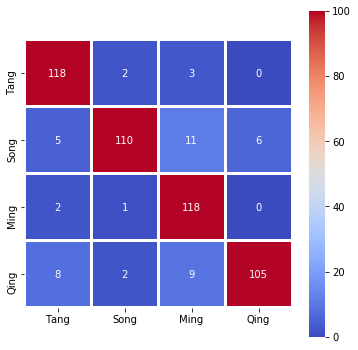

In [133]:
plot_heatmap(cm)

In [134]:
#cm = print_evaluations(y_test, m_lrcv.predict(X_test), 'LogisticRegressionCV')
print(accuracy_score(y_test, m_lrcv.predict(X_test)))
print(precision_score(y_test, m_lrcv.predict(X_test), average='weighted'))
print(recall_score(y_test, m_lrcv.predict(X_test), average='weighted'))
print(f1_score(y_test, m_lrcv.predict(X_test), average='weighted'))
print(m_lrcv.score(X_train, y_train), m_lrcv.score(X_test, y_test))
print(m_lrcv.score(X_train, y_train) - m_lrcv.score(X_test, y_test), m_lrcv.score(X_test, y_test) / m_lrcv.score(X_train,  y_train))

0.954
0.9553177611745238
0.954
0.9539810517861443
1.0 0.954
0.04600000000000004 0.954


In [135]:
cm_lrcv = confusion_matrix(y_test, m_lrcv.predict(X_test))

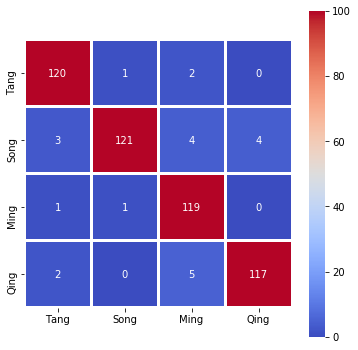

In [138]:
plot_heatmap(cm_lrcv)
plt.savefig('conf_lr_tr.jpg', dpi=300)

In [137]:
'''

baseline:
1.0 0.894
0.10599999999999998 0.894

with cut_all= True:

1.0 0.93
0.06999999999999995 0.93

ABSOLUTE HIGHSCORE!!!!

with words = jieba.lcut(text, cut_all=True, HMM=False):
no difference:
1.0 0.93
0.06999999999999995 0.93



m = MultinomialNB(alpha=1)
cv = CountVectorizer(tokenizer=tokenize_zh, min_df=2, max_df=30, ngram_range=(1,2))
NEW HIGSCORE!!!!!!!!!!!!!!
1.0 0.954
0.04600000000000004 0.954



m = MultinomialNB(alpha=1.1)
cv = CountVectorizer(tokenizer=tokenize_zh, min_df=2, max_df=30, ngram_range=(1,2))
raised alpha changes nothing.







'''

'\n\nbaseline:\n1.0 0.894\n0.10599999999999998 0.894\n\nwith cut_all= True:\n\n1.0 0.93\n0.06999999999999995 0.93\n\nABSOLUTE HIGHSCORE!!!!\n\nwith words = jieba.lcut(text, cut_all=True, HMM=False):\nno difference:\n1.0 0.93\n0.06999999999999995 0.93\n\n\n\nm = MultinomialNB(alpha=1)\ncv = CountVectorizer(tokenizer=tokenize_zh, min_df=2, max_df=30, ngram_range=(1,2))\nNEW HIGSCORE!!!!!!!!!!!!!!\n1.0 0.954\n0.04600000000000004 0.954\n\n\n\nm = MultinomialNB(alpha=1.1)\ncv = CountVectorizer(tokenizer=tokenize_zh, min_df=2, max_df=30, ngram_range=(1,2))\nraised alpha changes nothing.\n\n\n\n\n\n\n\n'